In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## creating helper function
- these methods are actually called as scripts.
- tf.keras.application is a module which has all the models like efficientnet, resnet, mobilenet etc, we can use them and apply to our own problem

In [ ]:
# make sure you convert to raw before downloading here
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-28 04:18:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-28 04:18:26 (85.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# these are not modules but function we are using from helper.py notebook saved on GitHub.
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
# get 10% of training data of 10 classes of food101.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-09-27 08:53:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   141MB/s    in 1.1s    

2021-09-27 08:53:05 (141 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
# check out how many images and subdirectories are in our dataset.
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                              image_size=IMG_SIZE,
                                                                              label_mode='categorical',
                                                                              batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                  image_size=IMG_SIZE,
                                                                  label_mode='categorical',
                                                                  batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# trying out recommendations that appear after placing dot(.)
train_data_10_percent.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
for images, labels in train_data_10_percent:
  print(images, labels)

Streaming output truncated to the last 5000 lines.
   [247.        234.        218.       ]
   [247.        234.        218.       ]
   [247.        234.        218.       ]]

  [[247.        234.        218.       ]
   [247.        234.        218.       ]
   [247.        234.        218.       ]
   ...
   [247.        234.        218.       ]
   [247.        234.        218.       ]
   [247.        234.        218.       ]]

  [[247.        234.        218.       ]
   [247.        234.        218.       ]
   [247.        234.        218.       ]
   ...
   [247.        234.        218.       ]
   [247.        234.        218.       ]
   [247.        234.        218.       ]]]


 [[[ 10.943877    9.943877    5.9438777]
   [  9.760203    8.760203    4.760204 ]
   [  8.637755    7.637755    3.637755 ]
   ...
   [  4.          4.          2.       ]
   [  3.          5.          4.       ]
   [  3.          5.          4.       ]]

  [[  8.071428    7.0714283   3.0714283]
   [  8.005102  

## keras sequential API vs  Functional API
- they are similar while compiling, fittting, evaluating.
- they differ while difining layers ( function API are more flexible and able to produce more sopisticated models.

# Model 0

### creating Feature extraction model using keras functional API
- the sequnetial api is straight-forward, it run our layers in sequential order.
- But functional API gives us the flexible with our models.

In [ ]:
# few important steps.

# 1.  create base model with tf.keras.applications
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model ( so the underlying pre-trained patterns aren't)
base_model.trainable = False

# 3. Create inputs into our model
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# 4. if using ResNet50V2 we will need to normalize inputs.
x= tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) # this is important so that inputs 
                                                                        # are same as that of whaht model is trained on

# 5. pass the inputs to base model
x=base_model(inputs)
print(f'shape after passing inputs through base model:  {x.shape}')

# 6. average pool the output of the base model (aggregate all the most important information, reduce number of computations.)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layers')(x)
print(f'shape aftert GlobalAveragePooling2D:  {x.shape}')

# 7. create the output activation layers
outputs =  tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. combine the inputs with the outputs into a model
model_0= tf.keras.Model(inputs, outputs)

# 9. compile for the model
model_0.compile(optimizer='adam',
                metrics=['accuracy'],
                loss='categorical_crossentropy')

# 10. fit the model.
history_10_percent=model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)), # validating only on 25% of data
            callbacks=[create_tensorboard_callback('transfer_learning',
                                                   experiment_name='10_percent_feature_extraction')]) # we got this from helper function we imported)


16719872/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model:  (None, 7, 7, 1280)
shape aftert GlobalAveragePooling2D:  (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210920-143011
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 81s 3s/step - loss: 1.9502 - accuracy: 0.3773 - val_loss: 1.4116 - val_accuracy: 0.6711
Epoch 2/5
24/24 [==============================] - 74s 3s/step - loss: 1.1818 - accuracy: 0.7280 - val_loss: 0.9679 - val_accuracy: 0.7599
Epoch 3/5
24/24 [==============================] - 74s 3s/step - loss: 0.8555 - accuracy: 0.8147 - val_loss: 0.7816 - val_accuracy: 0.8043
Epoch 4/5
24/24 [==============================] - 59s 3s/step - loss: 0.6986 - accuracy: 0.8320 - val_loss: 0.6806 - val_accuracy: 0.8257
Epoch 5/5
24/24 [==============================] - 73s 3s/step - loss: 0.5989 - accuracy: 0.8600 - val_loss: 0.6461 - val_accuracy: 0.8174


- Q- ] How we know that we need to rescale resnet?
  - Answer-] trial method after running we see an error that our model is not learning anything then we need to rescale the resnet model.
- EfficientNet have built-in rescaling so we dnt need to rescale in efficient


In [ ]:
# evaluate on full test_data.
model_0.evaluate(test_data) 

79/79 [==============================] - 127s 2s/step - loss: 0.6028 - accuracy: 0.8472


[0.6028336882591248, 0.8471999764442444]

In [ ]:
# As base model we have actually EfficientNet
for layer_number, layers in enumerate(base_model.layers):
  print(layer_number, layers.name)

0 input_3
1 rescaling_4
2 normalization_2
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, None, None, 3 7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_2[0][0]            
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inut_layer (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


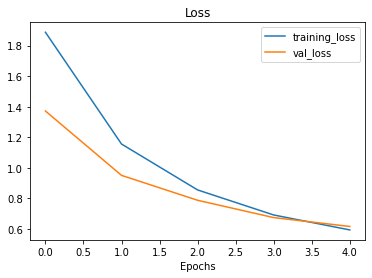

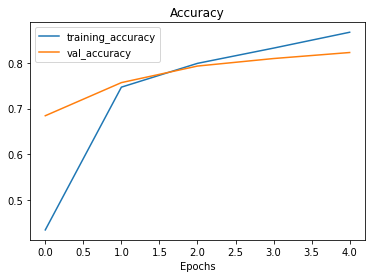

In [ ]:
# plotting our loss_curves
plot_loss_curves(history_10_percent)

### Getting feature vector from trained model
- Q-) What is global Average Pooling2D layer?
  - ans-) we hav etensors afetr our model goes through 'Base model' of shape (None, 7, 7, 1280)..
   But when it passes thriugh GloablAveragePooling2D, it turns (None, 1280). i.e. 4D tensor into 2D tensors. 

In [ ]:
input_shape= (1, 4, 4, 3)

# create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'random_input tensor:\n {input_tensor}\n')

#pass the random tensor through a global averagepool2D layer
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D gloabl_average_pooled random tensor:\n {global_average_pooled_tensor}\n')

#check the shape of different tensors
print(f'shape of input tensor: {input_tensor.shape}')
print(f'shape of global average pooled 2D tensor: {global_average_pooled_tensor.shape}')


random_input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D gloabl_average_pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

shape of input tensor: (1, 4, 4, 3)
shape of global average pooled 2D tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

One of the reason featureextraction transfer learning is named how it is because what often happen is pretrained model output a feature vector (alonng tensor of number which represent the learned representation of the model on a particular sample, in our case this is the output of kers.layers.GlobalAveragePooling2D() which can then be used to etract patterns out of the specific problem 

# running a series of transfer learning experments

we've seen the incredible results transfer learning can get with only 10% of training data, 
but how does it goes with 1% data....how about we set up a bunch of exeriment to find out: 

- `model_1` - use feature transfer learning with 1% of training data with data augumentation.
- `model_2`- use feature transfer learning with 10% of training data with data augumentation.
- `model_3`- use fine-tuning transfer learning with 10% of training data with data augumentation.
- `model_4`- use fine-tuning transfer learning with 100% of training data with data augumentation.

🔑**Note:** throughtout all the expeeriment the same test dataset will be used to evaluate our model... this ensures consistancy acrooss evaluation metrics.


# Model 1
- trtying feature extraction transfer learning wiith 1% of food data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-09-22 11:39:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   156MB/s    in 0.8s    

2021-09-22 11:39:44 (156 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# unzip the data
unzip_data('10_food_classes_1_percent.zip')

In [ ]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [ ]:
# how many images we are dealing with
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [ ]:
# setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE) # by default it is 32


test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode='categorical',
                                                       image_size=IMG_SIZE,
                                                       batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### adding data augumentation using neural layers.

To add data augumentation right into our model, we can use the layers inside:
- `tf.keras.layers.experimental.preprocessing()`
benefits:

- preprocessing happen on Gpu
- ImageDatagenerator happen on cpu

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create data augumentation stage with horizontal fliping, rotation, zoom etc
data_augumentation = keras.Sequential([
                                       preprocessing.RandomFlip('horizontal'),
                                       preprocessing.RandomRotation(0.2),
                                       preprocessing.RandomZoom(0.2),
                                       preprocessing.RandomHeight(0.2),
                                       preprocessing.RandomWidth(0.2)
                                       # preprocessing.Rescale(1./255) # can be use for model like ResNet50V2 and EfficientNet
], name='data_augumentation')                                          # and efficientnet already have rescale

augumented image


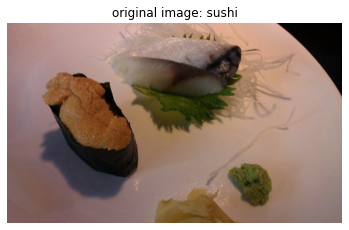

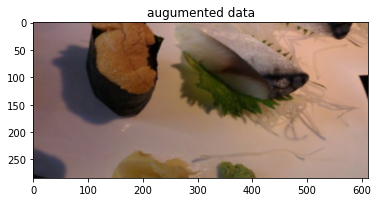

In [ ]:
# visualize our data augumented layer (and see what happen to our data)
# viewing a random image and comparing with augumented version.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir='/content/10_food_classes_1_percent/train/' + target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# plot the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'original image: {target_class}')
plt.axis(False)

#plot our augumented data
augumented_img = data_augumentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.title(f'augumented data')
plt.imshow(tf.squeeze(augumented_img)/255.)
print('augumented image')

### Model 1: Feature extraction transfer learning on 1% of data with

In [ ]:
input_shape=(224,224,3)

In [ ]:
IMG_SIZE + (3,)

(224, 224, 3)

### creating Feature extraction model using keras functional API

In [ ]:
# Skipping as steps will be same as for model 0. 
# modedl_1.summary
# evaluate model
# plot loss curve and compare with model_0

# Model_2
- trying feature extraction transfer learning with  10% of food data
- repeat same steps for model_2 as model_1

In [ ]:
# get 10% of data
# define train_dir_10_percent and test_dir
# setup data loader
# data augumentation using neural layers
# compile and fit
# plot_loss_curves

# Model checkpoint
- callbacks: tools which can addd helpful functionality to our model. some popular callbacks are: `tensorboard1`, `modelcheckpoint`, `Earlystopping` 
- Model checkpoint callbacks saves our model during training and start over where we left off.

In [ ]:
# set the checkpoint path 
checkpoint_path = 'saving_model_checkpoint.ckpt'

# create a modelcheckpoint callbacks that saves our model weights only
checkpoint_callbacks = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                          saves_weights_only=True,
                                                          saves_best_only=False,
                                                          save_freq='epoch', # saves after each epoch
                                                          verbode=1)

In [ ]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_aug"), 
                                                     checkpoint_callback])

# model will now train and we will see that model_0 perfoems better than model_1

NameError: ignored

In [ ]:
# plot loss curves
# evaluate on test data

In [ ]:
# assigning weights
model_2.load_weights(checkpoint_path)
loaded-weights_model_results = model_2.evaluate(test_data)

In [ ]:
# if the results are from previously valuated model_2 match the loaded weights
results_10_percent_data_aug == loaded_weights_model_results